In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def Rotation(theta):
    return np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])

In [3]:
theta = 0

In [4]:
Rotation(theta).shape

(2, 2)

In [5]:
Rotation(theta)

array([[ 1., -0.],
       [ 0.,  1.]])

In [6]:
# Define the shifted-rotated Rastrigin function
def f1(x, x_star=np.array([0.1, 0.1]), theta=0.2):
    z = Rotation(theta) * (x - x_star)
    return np.sum(z**2 + 1 - np.cos(10 * np.pi * z))


In [7]:
# Set up a grid for plotting
D = 50
x1 = np.linspace(-0.1, 0.2, D)
x2 = np.linspace(-0.1, 0.2, D)
X1, X2 = np.meshgrid(x1, x2)
Z = np.array([[f1(np.array([x1, x2])) for x1, x2 in zip(row1, row2)] for row1, row2 in zip(X1, X2)])



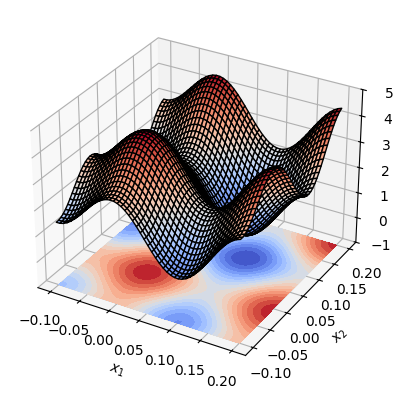

In [8]:
# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X1, X2, Z, cmap='coolwarm', edgecolor='k')

# Plot contours on the XY-plane
ax.contourf(X1, X2, Z, zdir='z', offset=-1, cmap='coolwarm', levels=20)

# Labels and customization
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$f(x)$')
ax.set_zlim(-1, 5)
plt.show()

In [9]:
# adding resolution function 

def e_r(x, x_star=np.array([0.1, 0.1]), theta=0.2, phi = 10000): 

    z = Rotation(theta) * (x - x_star)

    O = 1 - .0001*phi
    W = 10 * np.pi * O
    B = .5 * np.pi * O
    
    return np.sum(O * np.cos(W * z + B + np.pi)**2)



In [10]:
# Set up a grid for plotting
D = 100
phi = 5000
x1 = np.linspace(-0.1, 0.2, D)
x2 = np.linspace(-0.1, 0.2, D)
X1, X2 = np.meshgrid(x1, x2)
Z = np.array([[f1(np.array([x1, x2])) for x1, x2 in zip(row1, row2)] for row1, row2 in zip(X1, X2)])
E = np.array([[e_r(np.array([x1, x2]), phi = phi) for x1, x2 in zip(row1, row2)] for row1, row2 in zip(X1, X2)])

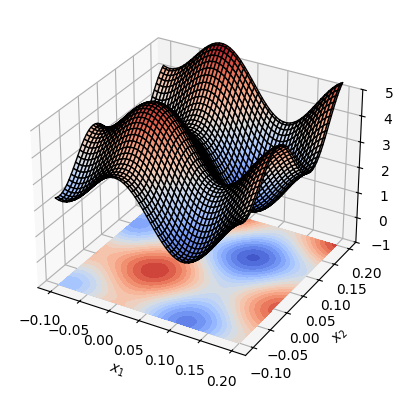

In [11]:
# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X1, X2, Z+E, cmap='coolwarm', edgecolor='k')

# Plot contours on the XY-plane
ax.contourf(X1, X2, Z+E, zdir='z', offset=-1, cmap='coolwarm', levels=20)

# Labels and customization
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$f(x)$')
ax.set_zlim(-1, 5)
plt.show()

In [12]:
# Set up a grid for plotting
D = 100
phi = 2500
x1 = np.linspace(-0.1, 0.2, D)
x2 = np.linspace(-0.1, 0.2, D)
X1, X2 = np.meshgrid(x1, x2)
Z = np.array([[f1(np.array([x1, x2])) for x1, x2 in zip(row1, row2)] for row1, row2 in zip(X1, X2)])
E = np.array([[e_r(np.array([x1, x2]), phi = phi) for x1, x2 in zip(row1, row2)] for row1, row2 in zip(X1, X2)])

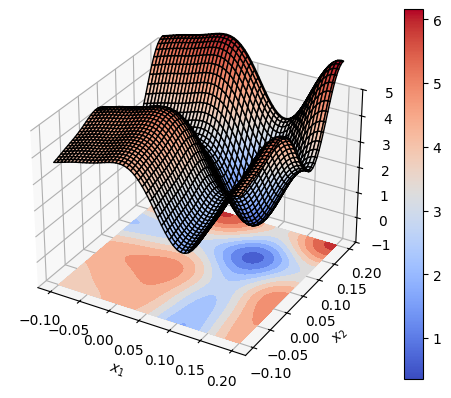

In [13]:
# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
mesh = ax.plot_surface(X1, X2, Z+E, cmap='coolwarm', edgecolor='k')

# Plot contours on the XY-plane
ax.contourf(X1, X2, Z+E, zdir='z', offset=-1, cmap='coolwarm', levels=10)

# Labels and customization
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$f(x)$')
ax.set_zlim(-1, 5)

fig.colorbar(mesh)
plt.show()

In [14]:
#######################
####### Optimize ######
#######################

In [15]:
# initial condition for res. distortion 
phi_temp = 10000

# location of global min 
x_star_temp =np.array([0.1, 0.1])

# degree of rotation 
theta_temp = .2

In [16]:
def e_r(x, x_star=x_star_temp, theta=theta_temp, phi = phi_temp): 

    z = Rotation(theta) * (x - x_star)

    O = 1 - .0001*phi
    W = 10 * np.pi * O
    B = .5 * np.pi * O
    
    return np.sum(O * np.cos(W * z + B + np.pi)**2)



# Define the shifted-rotated Rastrigin function
def f1(x, x_star=x_star_temp, theta=theta_temp):
    z = Rotation(theta) * (x - x_star)
    return np.sum(z**2 + 1 - np.cos(10 * np.pi * z))


In [17]:
def fun(x):

    '''
    Where x = 1x2 array
    Ex:
    x = np.array([-.1,-.1])
    
    
    '''
    E = e_r(x , phi = phi_temp)
    F = f1(x)
    
    return E + F
    



    

In [18]:
# test 
fun(np.array([.1,.1]))

0.0

In [19]:
## optimize 
x0 = np.array([-.1,-.1])
scipy.optimize.minimize(fun,x0,method = 'L-BFGS-B', options = {'ftol':1e-18,'gtol': 1e-18, 'eps': 1e-12,'maxfun':100}, tol=1e-18,)

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 1.4553207529727499
        x: [-9.739e-02 -9.740e-02]
      nit: 3
      jac: [ 0.000e+00  0.000e+00]
     nfev: 18
     njev: 6
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>